In [ ]:
%pip install transformers


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import trange
from google.colab import drive #подключение возможности брать данные с google диска
drive.mount('/content/drive/')
from sklearn.metrics import classification_report

Mounted at /content/drive/


In [ ]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

In [5]:
%cd /content/drive/MyDrive/
#вход в директорию, где содержится тестовый датасет

/content/drive/MyDrive


In [6]:
df = pd.read_csv('news.csv', encoding = 'ISO-8859-1')#у тестового датасета есть какая-то кодировка

Данные в тестовом датасете представляют собой текст некоторой длины и заранее определённую метку.
Согласно описанию на hugginface классификация осуществляется по 3 меткам: positive, neutral и negative.
Тестовый датасет предназначен для работы с finbert, т.к размечен под него.

**Пример данных**:

 **text** {treatment products in Usa , Canada , Mexico , Australia and Brazil Today , Global Research & Data Services is going to publish several market analyses about the markets for water treatment products in some selected countries .}

**sentiment** {negative}

In [7]:
headlines = df['headline'].to_list()


In [8]:
df

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [9]:
labels = {0:'neutral', 1:'positive',2:'negative'} #объявление меток для классификациии

In [ ]:
result = []#тут происходит классификация
for i in trange(len(headlines)):
    inputs = tokenizer(headlines[i], return_tensors = "pt", padding=True)
    outputs = finbert(**inputs)[0]
    #print(outputs)
    val = labels[np.argmax(outputs.detach().numpy())]#finbert возвращает PyTorch Tensor, который переводится в numpy array
    result.append(val)
   #print(headlines[i],'\n','#',val,'#')

## Пример выходных данных
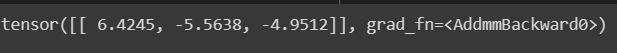

После чего необходимо взять максимум из полученного тензора.

In [34]:
pd.DataFrame(result).to_csv('out.csv', header = ['sentiment'], index = False)#экспорт результатов в csv

In [37]:
result_df = pd.read_csv('out.csv')#считывание датафрейма с результатами

In [38]:
result_df

,sentiment
0,neutral
1,neutral
2,neutral
3,positive
4,positive
...,...
4841,negative
4842,positive
4843,negative
4844,negative


In [ ]:
print(classification_report(df['sentiment'],result_df['sentiment']))

              precision    recall  f1-score   support

    negative       0.79      0.68      0.73       604
     neutral       0.79      0.92      0.85      2879
    positive       0.81      0.57      0.67      1363

    accuracy                           0.79      4846
   macro avg       0.80      0.73      0.75      4846
weighted avg       0.79      0.79      0.78      4846



In [39]:
cm = confusion_matrix(result_df['sentiment'],df['sentiment'], labels = ['neutral','positive','negative'])

In [40]:
cm

array([[2645,  533,  177],
       [ 174,  783,   14],
       [  60,   47,  413]])

Text(50.722222222222214, 0.5, 'ACTUAL')

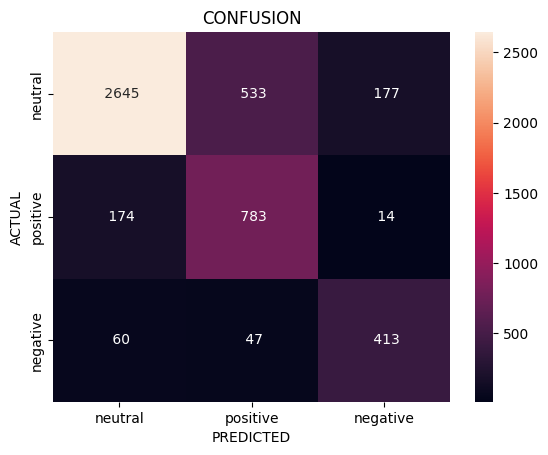

In [42]:
sns.heatmap(cm,
            annot= True,
            xticklabels = ['neutral','positive','negative'],
            yticklabels = ['neutral','positive','negative'],
            fmt = ' d')
plt.title('CONFUSION')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')